In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
def prob(x):
    z = (np.abs(x) - train.feature_1.mean(0))/ train.feature_1.std()
    return (1-sp.stats.norm.cdf(z))
def get_probs(df):
    return pd.DataFrame(df.apply(lambda x: prob(x)).apply(lambda x: x[0]*x[1],1), columns = ['probabilities'])

In [3]:
train = pd.DataFrame(np.random.normal(0,1, size = (100,2)), columns=['feature_1','feature_2'])
train['truth'] = 'Normal'

test = pd.DataFrame([
    [2.9,-2.5,2.5,3.3,-2.9,3.2,-2.9,2.1,3.5,-3.2],
    [-2.4,2.0,-3.2,2.9,3.1,3.5,3.3,-3.7,3.4,-3.3]
]).T
test.columns = ['feature_1','feature_2']
test['truth'] = 'Rare'

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


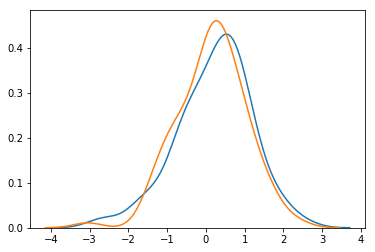

In [4]:
_= sns.kdeplot(train.feature_1.values), sns.kdeplot(train.feature_2.values)

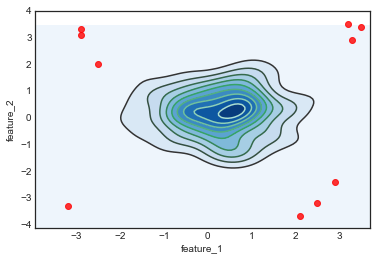

In [5]:
import seaborn as sns
# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(train.feature_1, train.feature_2)
#sns.plt.show()
 
# Custom it with the same argument as 1D density plot
sns.kdeplot(train.feature_1, train.feature_2, cmap="Reds", shade=True, bw=.15)
 
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
sns.kdeplot(train.feature_1, train.feature_2, cmap="Blues", shade=True, shade_lowest=True, )
sns.regplot(x="feature_1", y="feature_2", data=test,fit_reg=False,color='r')

In [6]:
table = pd.concat(
    [train, get_probs(train.iloc[:, 0:2])*100],
    1).append(
    pd.concat(
        [test, get_probs(test.iloc[:, 0:2])*100],
        1)).sort_values('probabilities')


In [7]:
episilon = table[table.truth == 'Rare'].probabilities.max()

In [8]:
table['pred'] =  ['Rare' if instance <= episilon else 'Normal' for instance in table.probabilities]

In [9]:
print(classification_report(y_pred = table.pred, y_true= table.truth))

             precision    recall  f1-score   support

     Normal       1.00      1.00      1.00       100
       Rare       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00       110



In [10]:
print(confusion_matrix(y_pred = table.pred, y_true= table.truth))

[[100   0]
 [  0  10]]
